1. Data Understanding

In [1]:
import pandas as pd
# Loading the re-uploaded training data
train_data = pd.read_csv('./dataset/train.csv')

# Displaying the first few rows of the training data
train_data.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


The training data has been successfully loaded, and we can observe the following columns:

1. ClaimNumber: The unique identifier for the claim.
2. DateTimeOfAccident: The date and time of the accident.
3. DateReported: The date when the accident was reported.
4. Age: Age of the claimant.
5. Gender: Gender of the claimant.
6. MaritalStatus: Marital status of the claimant.
7. DependentChildren: Number of dependent children.
8. DependentsOther: Number of other dependents.
9. WeeklyWages: Weekly wages of the claimant.
10. PartTimeFullTime: Indicator of part-time or full-time employment.
11. HoursWorkedPerWeek: Number of hours worked per week.
12. DaysWorkedPerWeek: Number of days worked per week.
13. ClaimDescription: Description of the claim.
14. InitialIncurredCalimsCost: Initial cost of the claim.
15. UltimateIncurredClaimCost: Ultimate cost of the claim.

Statistical Summary

In [2]:
# Displaying the statistical summary of the numerical variables
train_data.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,5.400000e+04,5.400000e+04
mean,33.842370,0.119185,0.009944,416.364807,37.735084,4.905759,7.841146e+03,1.100337e+04
std,12.122165,0.517780,0.109348,248.638669,12.568704,0.552129,2.058408e+04,3.339099e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,7.000000e+02,9.263384e+02
50%,32.000000,0.000000,0.000000,392.200000,38.000000,5.000000,2.000000e+03,3.371242e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9.500000e+03,8.197249e+03
max,81.000000,9.000000,5.000000,7497.000000,640.000000,7.000000,2.000000e+06,4.027136e+06


Here i find that interesting 
1. DependentChildren: Ranges from 0 to 9, with most claimants having no dependent children.
2. DependentsOther: Ranges from 0 to 5, with most claimants having no other dependents.
3. DaysWorkedPerWeek: Ranges from 1 to 7, with most claimants working 5 days a week.
4. InitialIncurredCalimsCost: Ranges from 1 to 2,000,000, indicating significant variation in initial claim costs.
5. UltimateIncurredClaimCost: Ranges from approximately 121.89 to 4,027,136, indicating significant variation in ultimate claim costs.

2. Data Preprocessing

In [3]:
# Displaying the data types of each column
data_types = train_data.dtypes

# Checking for missing values in each column
missing_values = train_data.isnull().sum()

# Combining the data types and missing values information
data_overview = pd.DataFrame({'Data Types': data_types, 'Missing Values': missing_values})
data_overview

,Data Types,Missing Values
ClaimNumber,object,0
DateTimeOfAccident,object,0
DateReported,object,0
Age,int64,0
Gender,object,0
MaritalStatus,object,29
DependentChildren,int64,0
DependentsOther,int64,0
WeeklyWages,float64,0
PartTimeFullTime,object,0


The data types and missing value analysis reveals the following:

* ClaimNumber, DateTimeOfAccident, DateReported, Gender, MaritalStatus, PartTimeFullTime, and ClaimDescription are object types (likely strings).
* Age, DependentChildren, DependentsOther, DaysWorkedPerWeek, and InitialIncurredCalimsCost are integer types.
WeeklyWages, HoursWorkedPerWeek, and UltimateIncurredClaimCost are float types.
* There are 29 missing values in the MaritalStatus column, which may require handling.

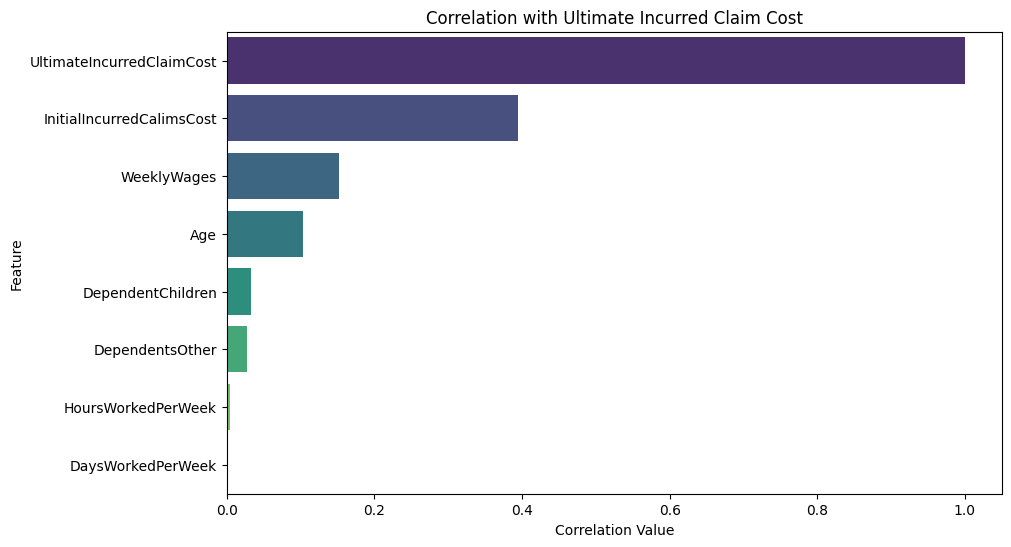

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying numerical features in the dataset
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

# Calculating the correlation matrix for numerical features
correlation_matrix = train_data[numerical_features].corr()

# Focusing on the correlation with the target variable "UltimateIncurredClaimCost"
correlations_with_target = correlation_matrix["UltimateIncurredClaimCost"].sort_values(ascending=False)

# Convert correlations with target into a DataFrame
correlations_data = pd.DataFrame(correlations_with_target).reset_index()
correlations_data.columns = ['Feature', 'Correlation']

# Create the barplot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=correlations_data, palette='viridis')

plt.title('Correlation with Ultimate Incurred Claim Cost')
plt.xlabel('Correlation Value')
plt.ylabel('Feature')
plt.show()

Based the diagram, here my keypoint :
1. InitialIncurredCalimsCost: Positive correlation of approximately 0.395. This indicates that as the initial incurred claims cost increases, the ultimate incurred claim cost tends to increase as well.
2. WeeklyWages: Positive correlation of approximately 0.152. This suggests that higher weekly wages are associated with higher ultimate incurred claim costs.
3. Age: Positive correlation of approximately 0.103. Older individuals may have higher ultimate incurred claim costs

Handling Missing Values

To handle these missing values, i'll fill them with the mode of the MaritalStatus column, which represents the most frequently occurring value.

In [5]:
# Filling missing values in the 'MaritalStatus' column with the mode
marital_status_mode = train_data['MaritalStatus'].mode().iloc[0]
train_data['MaritalStatus'].fillna(marital_status_mode, inplace=True)

# Verifying that there are no more missing values
missing_values_after_filling = train_data.isnull().sum()
missing_values_after_filling[missing_values_after_filling > 0]

Series([], dtype: int64)

Handling Outliers
for identify the outlier we can do :
Visualize Distributions: Plot the distribution of the features using box plots or histograms to visualize potential outliers.
Z-Score Analysis: Calculate the Z-scores for the features to identify observations that are far from the mean.

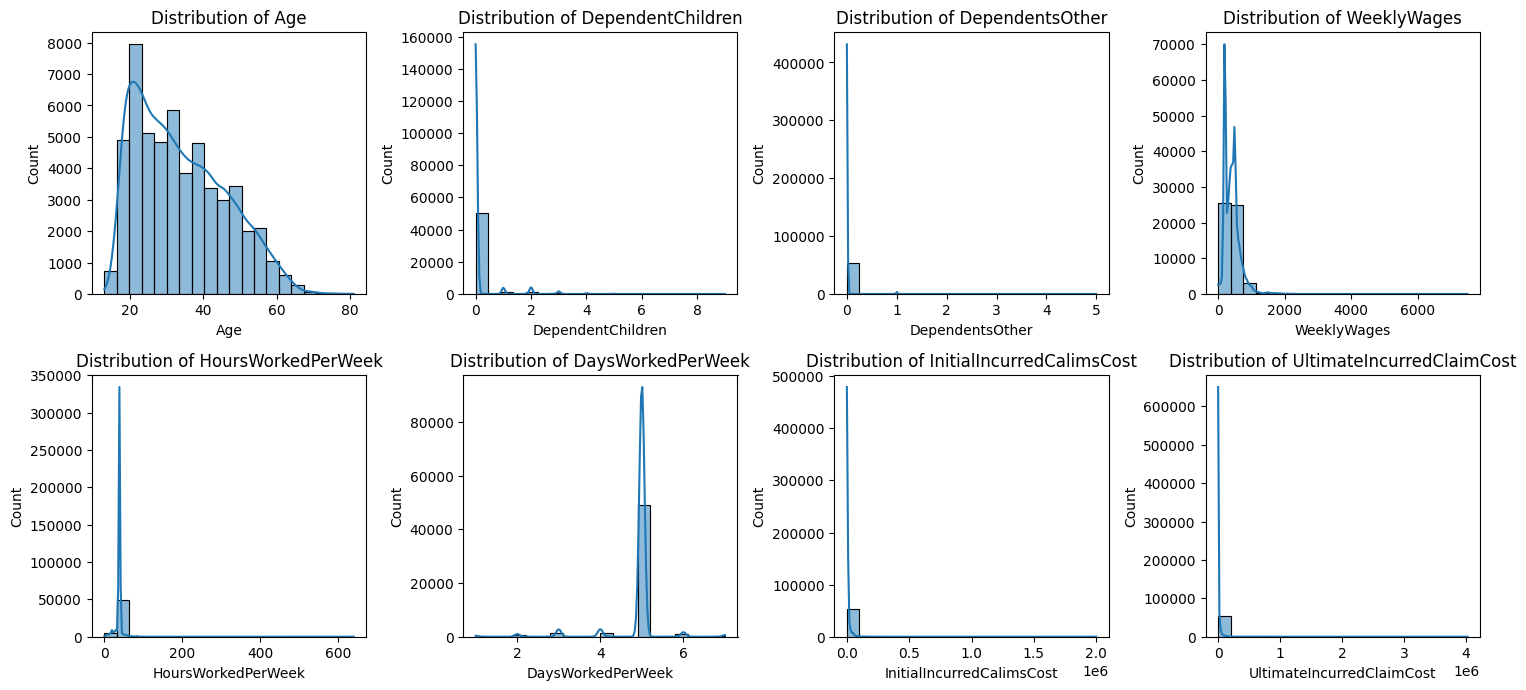

In [6]:
# Plotting histograms for numerical features
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, idx)
    sns.histplot(train_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Based histogram i get : 
- Features like "WeeklyWages," "HoursWorkedPerWeek," "InitialIncurredCalimsCost," and "UltimateIncurredClaimCost" exhibit significant skewness and potential outliers.
- "HoursWorkedPerWeek" has some instances where the values are considerably higher, which could be outliers.

In [7]:
# Calculating descriptive statistics for the "HoursWorkedPerWeek" feature
hours_worked_stats = train_data["HoursWorkedPerWeek"].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
hours_worked_stats

count    54000.000000
mean        37.735084
std         12.568704
min          0.000000
1%          10.000000
5%          22.381500
25%         38.000000
50%         38.000000
75%         40.000000
95%         40.000000
99%         60.000000
max        640.000000
Name: HoursWorkedPerWeek, dtype: float64

The maximum value of 640 hours is clearly an outlier, as it is significantly higher than the 99th percentile value of 60 hours. Method i suggest to fix the ourlier is Capping Method
Pros:
Can use domain knowledge or percentiles (e.g., 99th percentile) to cap values.
Does not rely on the assumption of normal distribution.
Cons:
Requires manual selection of the cap value, which may be arbitrary.
May lose some information if capping is too aggressive.

In [8]:
# Identify the 1st and 99th percentiles for "HoursWorkedPerWeek"
lower_bound = train_data['HoursWorkedPerWeek'].quantile(0.01)
upper_bound = train_data['HoursWorkedPerWeek'].quantile(0.99)

# Apply capping to the "HoursWorkedPerWeek" feature
train_data['HoursWorkedPerWeek'] = train_data['HoursWorkedPerWeek'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Check the distribution after capping
train_data['HoursWorkedPerWeek'].describe()

count    54000.000000
mean        37.428914
std          6.392101
min         10.000000
25%         38.000000
50%         38.000000
75%         40.000000
max         60.000000
Name: HoursWorkedPerWeek, dtype: float64

3. Feature Engineering

based dataset and learning domain knowledge, the feature that created is
- Ratio of Initial to Ultimate Cost: Creating a feature that represents the ratio between the initial and ultimate incurred claim cost might capture important information.
- Income-related Features: Combining weekly wages with other factors like dependent children and dependents' other might create meaningful features related to the financial situation of the claimant.
- Age and Employment Type: Analyzing the relationship between age, part-time/full-time status, and weekly wages might uncover additional patterns.

In [11]:
# Creating a new feature representing the ratio between initial and ultimate incurred claim cost
train_data['Initial_Ultimate_Ratio'] = train_data['InitialIncurredCalimsCost'] / train_data['UltimateIncurredClaimCost']

# Creating a new feature representing the weekly wages per dependent (children + other dependents)
train_data['Wages_Per_Dependent'] = train_data['WeeklyWages'] / (train_data['DependentChildren'] + train_data['DependentsOther'] + 1) # Adding 1 to avoid division by zero

# Creating a feature that multiplies age by weekly wages for part-time workers
train_data['Age_Wages_PartTime'] = train_data['Age'] * train_data['WeeklyWages'] * (train_data['PartTimeFullTime'] == 'PartTime')

# Creating a feature that multiplies age by weekly wages for full-time workers
train_data['Age_Wages_FullTime'] = train_data['Age'] * train_data['WeeklyWages'] * (train_data['PartTimeFullTime'] == 'FullTime')

#displaying summary statistics for the new features
train_data[['Initial_Ultimate_Ratio', 'Wages_Per_Dependent', 'Age_Wages_PartTime', 'Age_Wages_FullTime']].describe()

,Initial_Ultimate_Ratio,Wages_Per_Dependent,Age_Wages_PartTime,Age_Wages_FullTime
count,54000.000000,54000.000000,54000.0,54000.0
mean,0.988913,394.548164,0.0,0.0
std,0.584611,238.700726,0.0,0.0
min,0.000114,0.500000,0.0,0.0
25%,0.553469,200.000000,0.0,0.0
50%,0.940640,369.333333,0.0,0.0
75%,1.330440,500.000000,0.0,0.0
max,22.919141,7497.000000,0.0,0.0


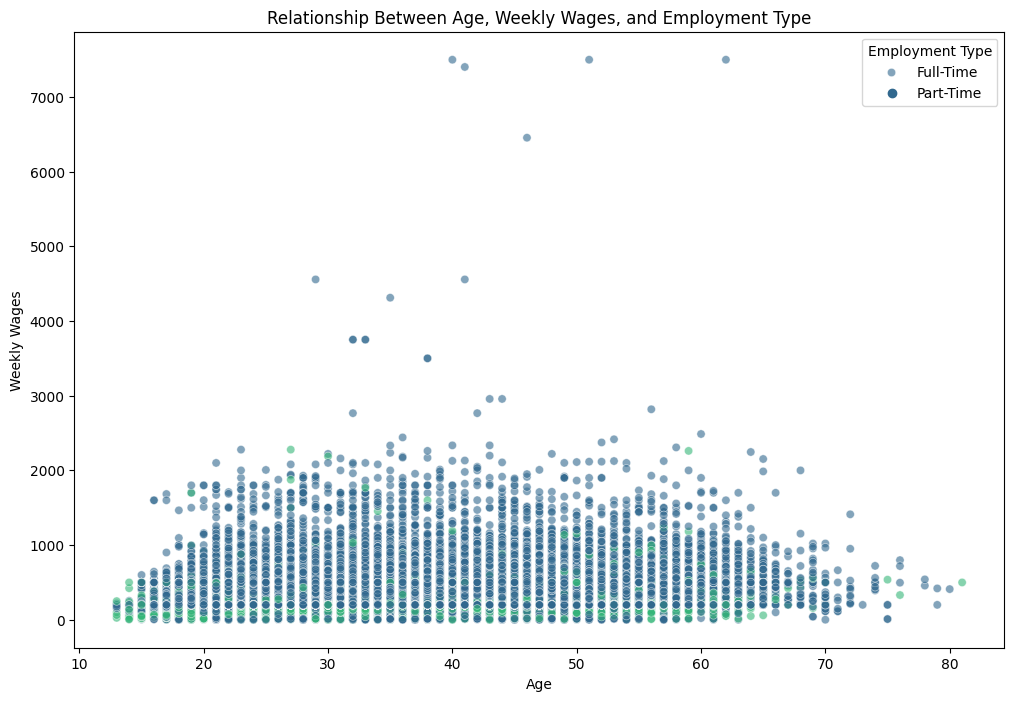

In [13]:
# Displaying the unique values in the PartTimeFullTime column
part_time_full_time_values = train_data['PartTimeFullTime'].unique()
part_time_full_time_values

# Plotting the relationship between age, weekly wages, and part-time/full-time status
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='WeeklyWages', hue='PartTimeFullTime', data=train_data, palette='viridis', alpha=0.6)
plt.title('Relationship Between Age, Weekly Wages, and Employment Type')
plt.xlabel('Age')
plt.ylabel('Weekly Wages')
plt.legend(title='Employment Type', labels=['Full-Time', 'Part-Time'])
plt.show()

In [9]:
# Plotting the distribution of the Initial_Ultimate_Ratio feature
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Initial_Ultimate_Ratio'], bins=50, kde=True)
plt.title('Distribution of Ratio Between Initial and Ultimate Incurred Claim Cost')
plt.xlabel('Initial to Ultimate Cost Ratio')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of the Wages_Per_Dependent feature
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Wages_Per_Dependent'], bins=50, kde=True)
plt.title('Distribution of Weekly Wages Per Dependent')
plt.xlabel('Weekly Wages Per Dependent')
plt.ylabel('Frequency')
plt.show()

NameError: name 'A' is not defined